# Analysis of Cryptocurrency Prices

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Analyzing Cryptocurrency Data with the CryptoData Class
2. Fetching and Structuring Cryptocurrency Market Data
3. Data Cleaning and Analysis for Cryptocurrency Prices
4. CryptoData: Comprehensive Analysis of Price Trends
5. Statistical Analysis of Cryptocurrency Returns Using CryptoData
6. Visualizing and Analyzing Cryptocurrency Price Movements
7. Cryptocurrency Price Data: Fetching, Cleaning, and Analysis
8. Detailed Return Analysis of Cryptocurrency Pairs with CryptoData

In [3]:
class CryptoData:
    def __init__(self, pair_name, url):
        self.pair_name = pair_name
        self.url = url
        self.data = self.fetch_data()

    def fetch_data(self):
        r = requests.get(self.url).json()
        result_key = list(r['result'].keys())[0]
        data = pd.DataFrame(r['result'][result_key], columns=['time', 'open', 'high', 'low', 'price', 'vwap', 'volume', 'count'])
        data['time'] = pd.to_datetime(data['time'], unit='s')
        data['currency'] = self.pair_name
        return data

    def clean_and_structure_data(self):
    # Define required columns
        required_columns = ['time', 'open', 'high', 'low', 'price', 'vwap', 'volume', 'currency']
    
    # Select only required columns (ensure all columns exist)
        if all(col in self.data.columns for col in required_columns):
            self.data = self.data[required_columns]
        else:
            raise ValueError("Missing one or more required columns in the dataset")

    # Handle missing values (fill numeric columns with mean)
        self.data = self.data.fillna(self.data.select_dtypes(include=[np.number]).mean())

    # Convert 'price' column to numeric (coerce invalid values to NaN)
        self.data['price'] = pd.to_numeric(self.data['price'], errors='coerce')
    
    # Remove rows where 'price' is NaN or <= 0 (before calculating log returns)
        self.data = self.data.dropna(subset=['price'])
        self.data = self.data[self.data['price'] > 0]

    # Compute logarithmic returns for 'price'
        self.data['log_return'] = np.log(self.data['price'] / self.data['price'].shift(1))

    # Add any additional cleaning or structuring logic here


    def save_to_csv(self):
        self.data.to_csv(f'{self.pair_name.lower()}_data.csv', index=False)

    def save_analysis_results(self, file_name):
        analysis_results = pd.DataFrame({
            'Mean Return': [self.data['log_return'].mean()],
            'Median Return': [self.data['log_return'].median()],
            'Std Deviation of Returns': [self.data['log_return'].std()],
            'Highest Return Date': [self.data.loc[self.data['log_return'].idxmax()]['time']]
        })
        analysis_results.to_csv(file_name, index=False)
        
    def print_data(self):
        print(f"Data for {self.pair_name}:\n{self.data}\n{'='*40}")

    def analyze_returns(self):
        # Calculate mean, median, and standard deviation of returns
        mean_return = self.data['log_return'].mean()
        median_return = self.data['log_return'].median()
        std_return = self.data['log_return'].std()

        print(f"Analysis for {self.pair_name}:\n"
              f"Mean Return: {mean_return}\n"
              f"Median Return: {median_return}\n"
              f"Standard Deviation of Returns: {std_return}\n{'='*40}")

    def identify_highest_return_date(self):
        max_return_date = self.data.loc[self.data['log_return'].idxmax()]['time']
        print(f"Highest Return Date for {self.pair_name}: {max_return_date}\n{'='*40}")

    def visualize_historical_prices(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data['time'], self.data['price'], label=f"{self.pair_name} Price")
        plt.title(f"Historical Prices of {self.pair_name}")
        plt.xlabel('Time')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.show()

    def visualize_mean_returns_comparison(self, mean_returns):
        plt.bar(mean_returns.index, mean_returns['Mean Return'], color=['blue', 'orange', 'green'])
        plt.title("Comparison of Mean Returns")
        plt.xlabel('Cryptocurrency')
        plt.ylabel('Mean Return')
        plt.show()



In [14]:
# Define cryptocurrency pairs and their corresponding URLs
crypto_pairs = {
    'Bitcoin': 'https://api.kraken.com/0/public/OHLC?pair=xbtusd&interval=1440',
    'Ripple': 'https://api.kraken.com/0/public/OHLC?pair=xrpusd&interval=1440',
    'Ethereum': 'https://api.kraken.com/0/public/OHLC?pair=ethusd&interval=1440'
}

In [16]:
# Create CryptoData instances for each cryptocurrency
crypto_objects = {crypto: CryptoData(crypto, url) for crypto, url in crypto_pairs.items()}

Processing data for Bitcoin...
Cleaning and structuring data...
Saving data to CSV...
Printing data summary...
Data for Bitcoin:
          time      open      high       low     price      vwap  \
0   2023-02-07   22765.5   23347.7   22750.1   23253.2   23055.8   
1   2023-02-08   23253.3   23450.0   22675.5   22964.8   23049.1   
2   2023-02-09   22963.6   23008.2   21700.0   21792.0   22333.1   
3   2023-02-10   21792.0   21939.9   21475.0   21639.8   21716.1   
4   2023-02-11   21638.2   21909.8   21610.9   21868.2   21780.6   
..         ...       ...       ...       ...       ...       ...   
715 2025-01-22  106162.8  106293.4  103271.3  103648.5  104664.0   
716 2025-01-23  103648.6  106833.2  101281.7  103920.2  104188.7   
717 2025-01-24  103920.2  107080.6  102800.0  104840.4  105315.2   
718 2025-01-25  104840.4  105194.1  104250.0  104705.2  104662.4   
719 2025-01-26  104705.3  105380.0  104500.0  104610.9  104782.1   

            volume currency  log_return  
0    2505.20

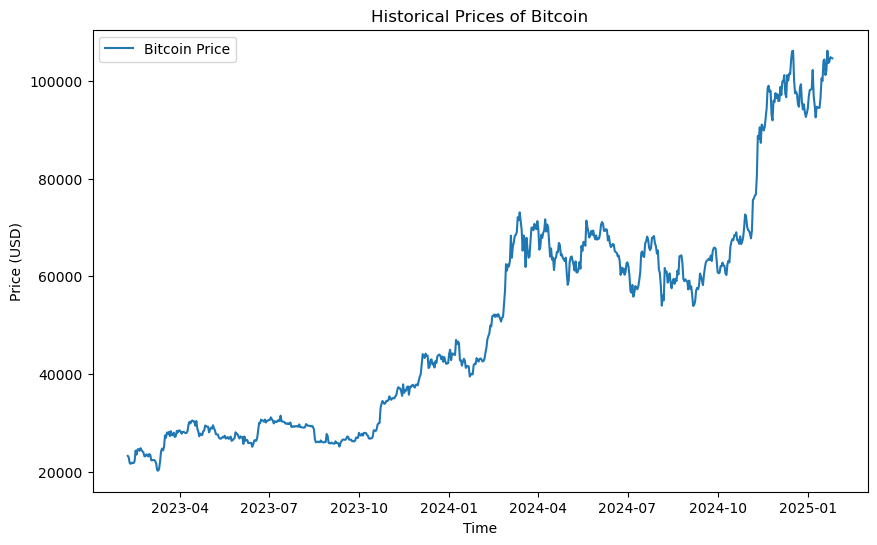

Finished processing for Bitcoin.

Processing data for Ripple...
Cleaning and structuring data...
Saving data to CSV...
Printing data summary...
Data for Ripple:
          time     open     high      low    price     vwap  \
0   2023-02-07  0.39204  0.40482  0.39042  0.40380  0.39714   
1   2023-02-08  0.40366  0.40577  0.39400  0.39798  0.39975   
2   2023-02-09  0.39773  0.40861  0.37294  0.38165  0.39222   
3   2023-02-10  0.38179  0.38761  0.37770  0.38218  0.38283   
4   2023-02-11  0.38200  0.38407  0.38000  0.38372  0.38221   
..         ...      ...      ...      ...      ...      ...   
715 2025-01-22  3.17504  3.28529  3.13000  3.17600  3.19890   
716 2025-01-23  3.17728  3.18500  3.03564  3.11963  3.10149   
717 2025-01-24  3.11963  3.20722  3.05499  3.10303  3.14737   
718 2025-01-25  3.10303  3.14000  3.07500  3.10789  3.11079   
719 2025-01-26  3.10797  3.14200  3.10428  3.11521  3.12915   

                volume currency  log_return  
0     4151144.47098773   Ripple     

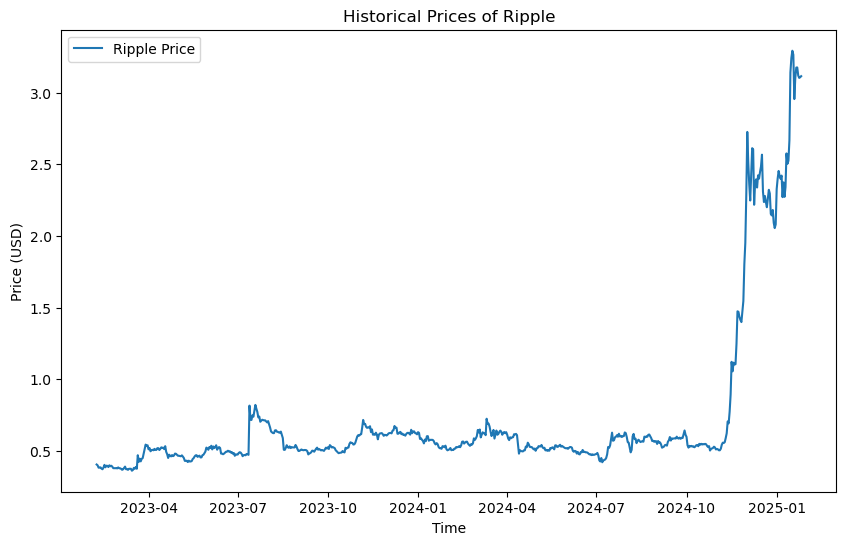

Finished processing for Ripple.

Processing data for Ethereum...
Cleaning and structuring data...
Saving data to CSV...
Printing data summary...
Data for Ethereum:
          time     open     high      low    price     vwap          volume  \
0   2023-02-07  1615.25  1677.30  1610.97  1672.40  1648.09  34980.30665900   
1   2023-02-08  1672.00  1698.00  1630.77  1650.33  1664.85  27590.55606086   
2   2023-02-09  1650.32  1655.53  1522.11  1545.17  1587.13  52001.53133073   
3   2023-02-10  1545.00  1554.20  1492.00  1514.17  1525.71  33712.24623542   
4   2023-02-11  1513.01  1543.65  1503.33  1539.21  1524.19  21278.24094838   
..         ...      ...      ...      ...      ...      ...             ...   
715 2025-01-22  3327.23  3363.77  3222.41  3239.35  3288.10  15768.57457524   
716 2025-01-23  3239.35  3346.92  3181.79  3337.96  3243.90  25785.02087467   
717 2025-01-24  3338.84  3427.00  3276.45  3309.92  3362.59  22297.82490878   
718 2025-01-25  3309.92  3349.75  3270.00  331

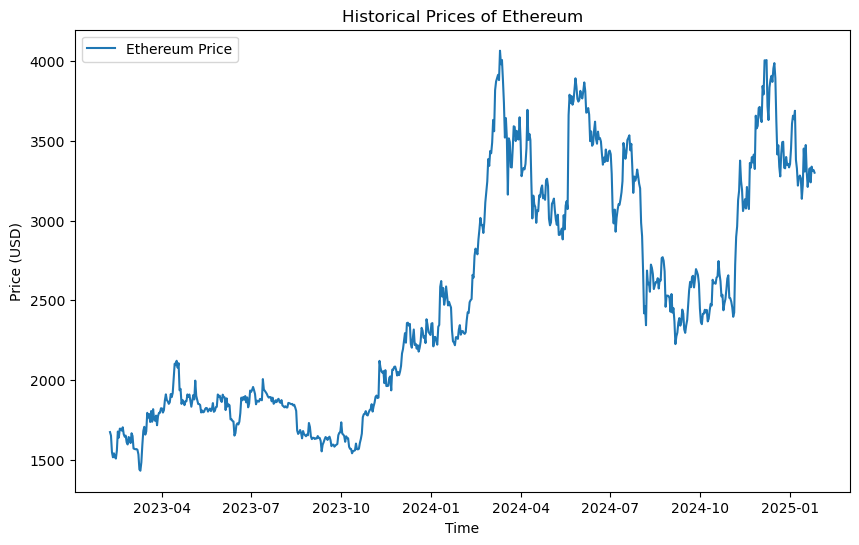

Finished processing for Ethereum.



In [7]:
# Loop through each cryptocurrency and perform operations
for crypto_obj in crypto_objects.values():
    print(f"Processing data for {crypto_obj.pair_name}...")

    # Step 1: Clean and structure the data
    print("Cleaning and structuring data...")
    crypto_obj.clean_and_structure_data()

    # Step 2: Save cleaned data to a CSV file
    print("Saving data to CSV...")
    crypto_obj.save_to_csv()

    # Step 3: Print a summary of the structured data
    print("Printing data summary...")
    crypto_obj.print_data()

    # Step 4: Analyze returns (e.g., mean, median, std deviation)
    print("Analyzing returns...")
    crypto_obj.analyze_returns()

    # Step 5: Identify the date with the highest return
    print("Identifying highest return date...")
    crypto_obj.identify_highest_return_date()

    # Step 6: Visualize historical prices
    print("Visualizing historical prices...")
    crypto_obj.visualize_historical_prices()

    print(f"Finished processing for {crypto_obj.pair_name}.\n")


In [8]:
# Calculate mean returns for each cryptocurrency
mean_returns = pd.DataFrame({'Mean Return': [crypto_obj.data['log_return'].mean() for crypto_obj in crypto_objects.values()]}, index=crypto_objects.keys())


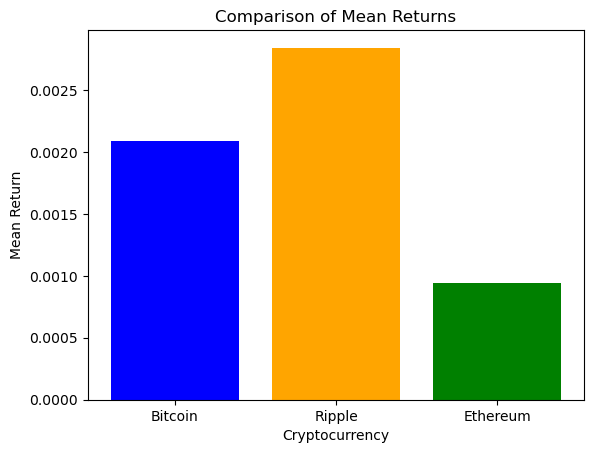

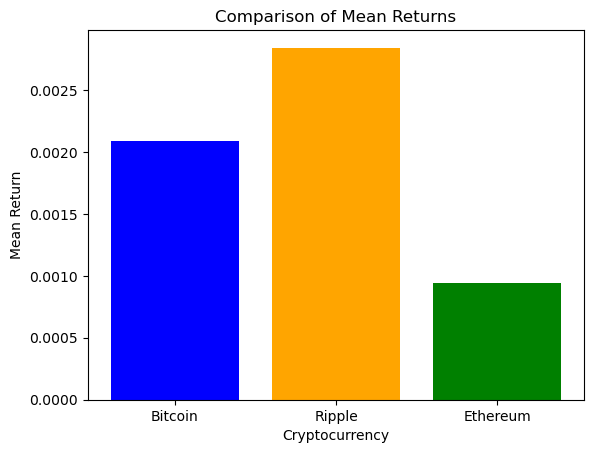

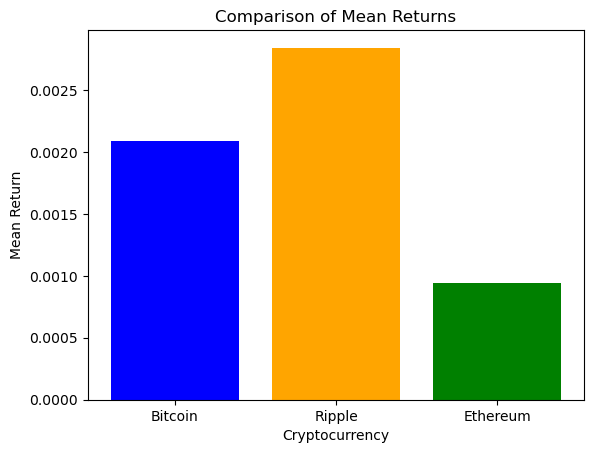

In [9]:
# Visualize mean returns comparison
for crypto_obj in crypto_objects.values():
    crypto_obj.visualize_mean_returns_comparison(mean_returns)

In [10]:
# Save analysis results to CSV
for crypto_obj in crypto_objects.values():
    crypto_obj.save_analysis_results(f'{crypto_obj.pair_name.lower()}_analysis_results.csv')

In [11]:
summary_data = pd.DataFrame(columns=['Cryptocurrency', 'Mean Return', 'Median Return', 'Std Deviation of Returns', 'Highest Return Date'])

# Load and append analysis results for each cryptocurrency
for crypto_obj in crypto_objects.values():
    analysis_results = pd.read_csv(f'{crypto_obj.pair_name.lower()}_analysis_results.csv')
    
    # Append a new row for each cryptocurrency
    summary_data = pd.concat([summary_data, pd.DataFrame({
        'Cryptocurrency': [crypto_obj.pair_name],
        'Mean Return': [analysis_results['Mean Return'].iloc[0]],
        'Median Return': [analysis_results['Median Return'].iloc[0]],
        'Std Deviation of Returns': [analysis_results['Std Deviation of Returns'].iloc[0]],
        'Highest Return Date': [analysis_results['Highest Return Date'].iloc[0]]
    })], ignore_index=True)

# Write the DataFrame to an Excel file for better visualization
output_file = 'crypto_analysis_summary.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    summary_data.to_excel(writer, index=False, sheet_name='Summary')

print(f"Summary saved to {output_file}")

Summary saved to crypto_analysis_summary.xlsx


In [12]:
# Print summary dataframe
print("Summary of Findings:")
print(summary_data)

Summary of Findings:
  Cryptocurrency  Mean Return  Median Return  Std Deviation of Returns  \
0        Bitcoin     0.002092       0.000270                  0.025416   
1         Ripple     0.002842       0.000710                  0.043390   
2       Ethereum     0.000945       0.000223                  0.029652   

  Highest Return Date  
0          2024-08-08  
1          2023-07-13  
2          2024-05-20  
